In [1]:
import os
import sys
import math
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import cv2
import skimage
from skimage import io
import matplotlib.pyplot as plt

sys.path.insert(1, '/home/labs/hornsteinlab/Collaboration/MOmaps')

%reload_ext autoreload
%autoreload 2
%aimport

#import src.common.lib.image_metrics as image_metrics 
#from src.common.lib.embeddings_utils import load_embeddings
#from src.common.lib.preprocessing_utils import rescale_intensity

pd.set_option('display.max_rows', 500)

INPUT_DIR = '/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/processed/spd2/SpinningDisk/'

Modules to reload:
all-except-skipped

Modules to skip:



In [2]:
def processed_path_to_raw_paths(path):
    path_splited = path.split(os.sep)
    filename = path_splited[-1]
    filename_split = filename.split('_')
    rep = filename_split[0]
    panel = filename_split[4]
    line = filename_split[5]
    filename_new = '_'.join(filename_split[1:4])
    batch = path_splited[-5]
    batch = batch.split('_')[0]
    cond = path_splited[-3]
    marker = path_splited[-2]
    
    ret = os.path.join("/home/labs/hornsteinlab/Collaboration/MOmaps/input/images/raw/SpinningDisk", batch, line, panel, cond, rep, marker, f'{filename_new}.tif')
    return ret


In [3]:
def rescale_intensity(img_current_channel):
    """Return image after stretching or shrinking its intensity levels.

    The desired intensity range of the input and output, in_range and out_range respectively, 
    are used to stretch or shrink the intensity range of the input image
    
    see: https://scikit-image.org/docs/stable/api/skimage.exposure.html#skimage.exposure.rescale_intensity
    
    Args:
        img_current_channel (numpy ndarray): the image to scale

    Returns:
        img_scaled (numpy ndarray): image in scale of [0,1] after rescaling
    """
    
    vmin, vmax = np.percentile(img_current_channel, q=(0.5, 99.9))
    img_scaled = skimage.exposure.rescale_intensity(
                                                    img_current_channel,
                                                    in_range=(vmin, vmax),
                                                    out_range=np.float32
        )
    return img_scaled

def show_label(path):
    path_l = path.split("/")
    return path_l[-7:]

def show_processed_tif(path):
    # read the image stack
    img = cv2.imread(path, cv2.IMREAD_ANYDEPTH) 
    
    # rescale pixel intensities
    img = rescale_intensity(img)
    
    # show the image with grid 
    fig, ax = plt.subplots(figsize=(7,7))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(show_label(path), color='purple')

    plt.show()

    
def print_all_tiles_in_site(tiles_path):

    # Tiles
    images = np.load(tiles_path)
    print(f"{images.shape[0]} Tiles passed QC")
    n = math.ceil(images.shape[0]/4)
    fig, axs = plt.subplots(n, 4, figsize=(8, 8))
    fig.subplots_adjust(hspace=0, wspace=0)
    j = 0
    for i in range(images.shape[0]):
        tile = images[i,:,:,0]
        t = i
        if (i!=0 and i%4==0): 
            j+=1
        if (i>3):
            t=i-(4*j)
        #print(j,t,1)    
        axs[j,t].imshow(tile, cmap='gray', vmin=0, vmax=1)
        axs[j,t].get_xaxis().set_visible(False)
        axs[j,t].get_yaxis().set_visible(False)

    # fill empty space in subplots
    empty = n * 4 - images.shape[0]
    for k in range(1,empty+1):
        axs[j,t+k].imshow(np.ones([100,100]), cmap='Grays')
        axs[j,t+k].get_xaxis().set_visible(False)
        axs[j,t+k].get_yaxis().set_visible(False)
    fig.tight_layout()
    plt.show()

In [4]:
OLD_BATCH = os.path.join(INPUT_DIR, 'batch9_16bit_no_downsample/WT/stress/G3BP1/')
NEW_BATCH = os.path.join(INPUT_DIR, 'batch9/WT/stress/G3BP1/')

Original raw site (with rescale_intensities):


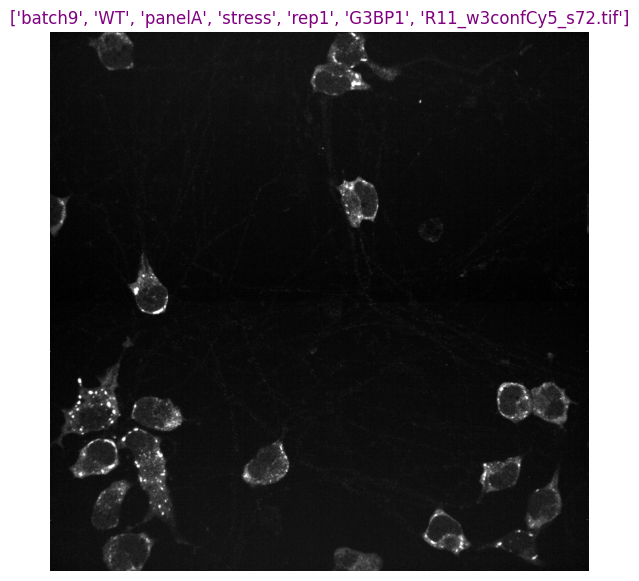


OLD batch9_16bit_no_downsample:
7 Tiles passed QC


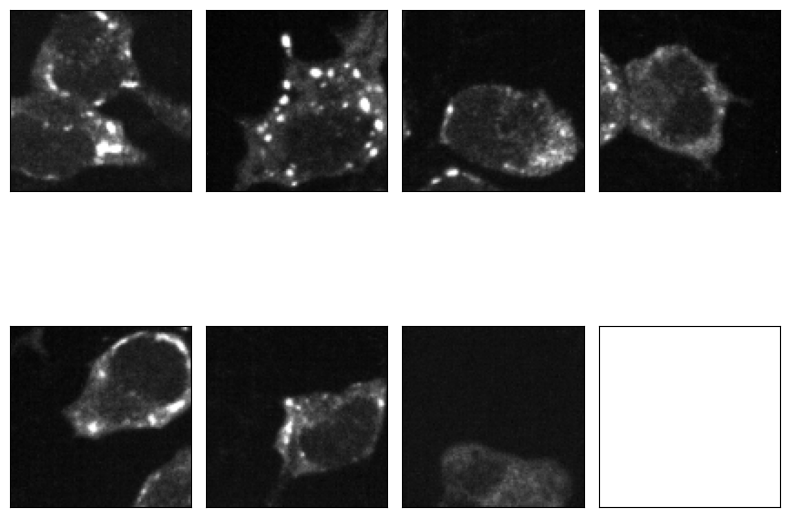


NEW Batch9:
10 Tiles passed QC


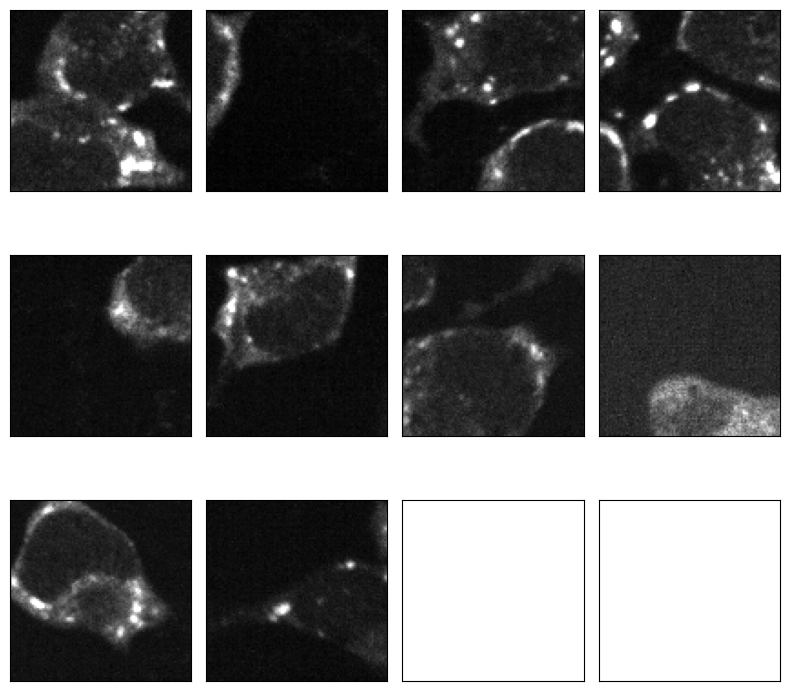

In [5]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep1_R11_w3confCy5_s72_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep1_R11_w3confCy5_s72_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

Original raw site (with rescale_intensities):


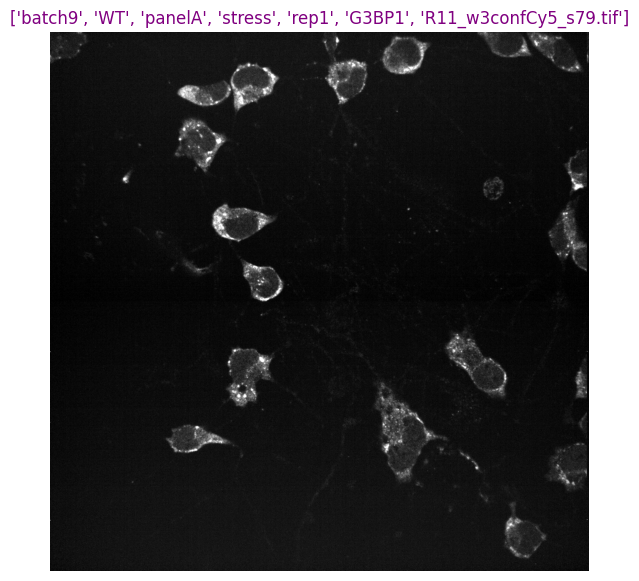


OLD batch9_16bit_no_downsample:
8 Tiles passed QC


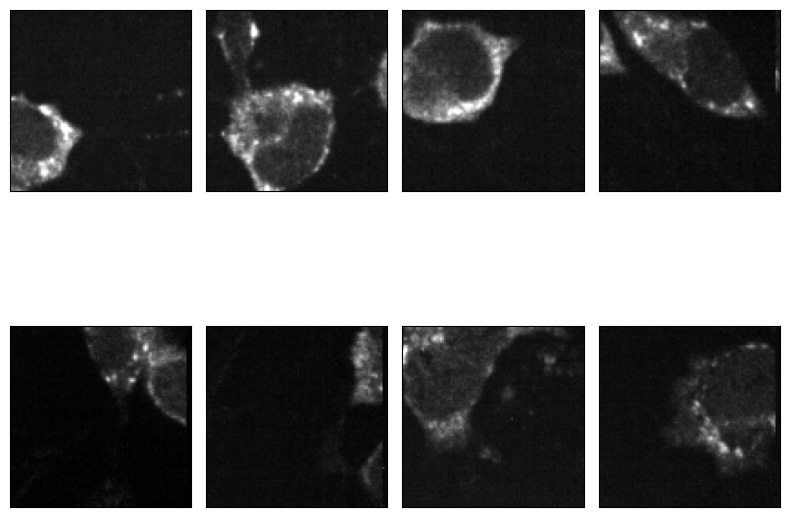


NEW Batch9:
12 Tiles passed QC


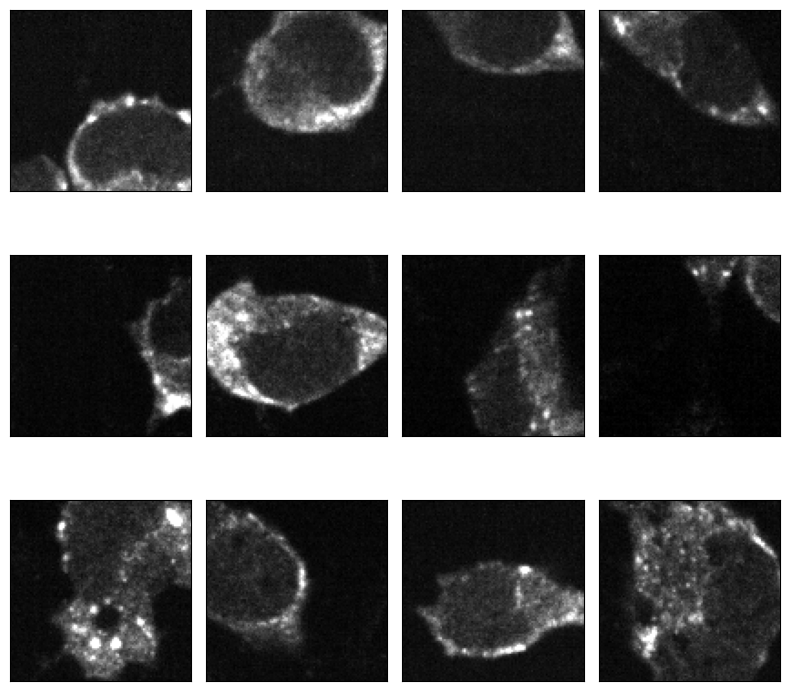

In [6]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep1_R11_w3confCy5_s79_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep1_R11_w3confCy5_s79_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

Original raw site (with rescale_intensities):


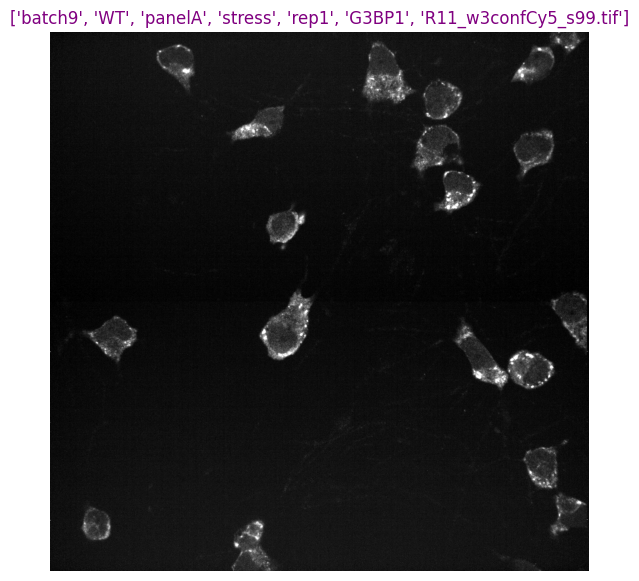


OLD batch9_16bit_no_downsample:
8 Tiles passed QC


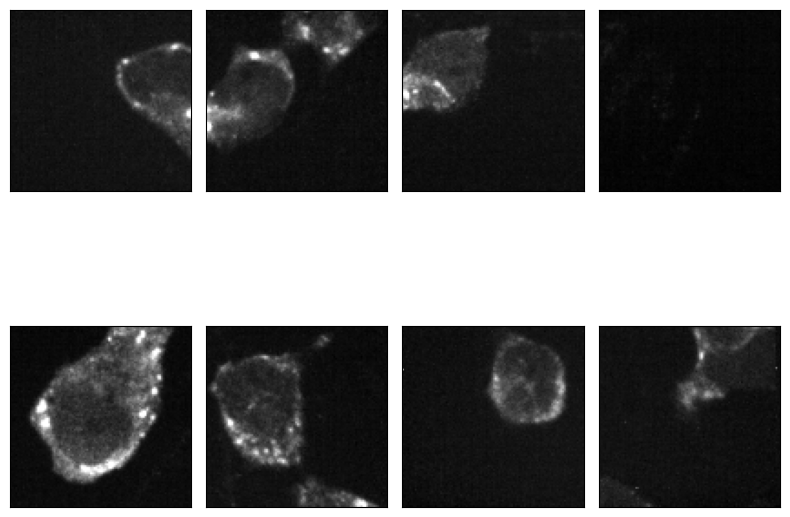


NEW Batch9:
10 Tiles passed QC


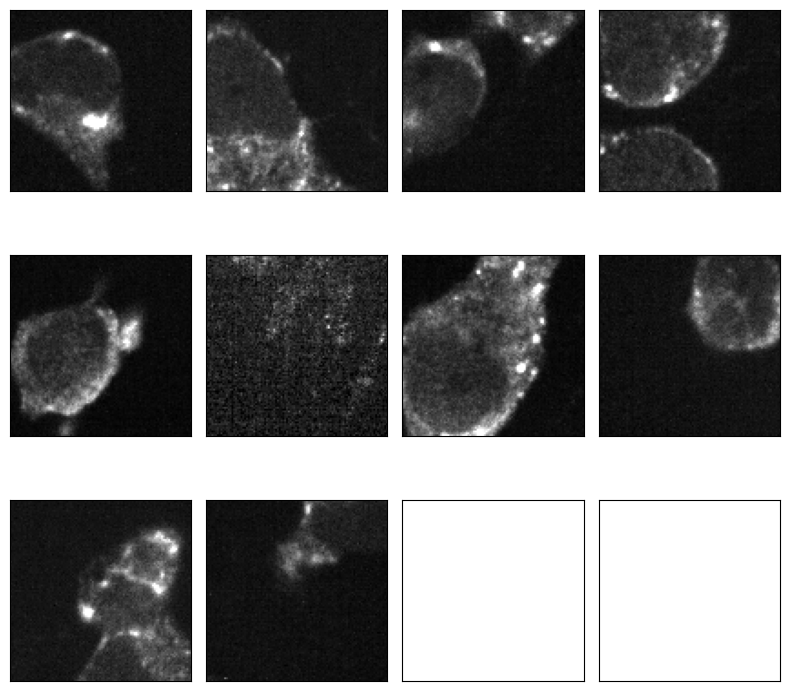

In [7]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep1_R11_w3confCy5_s99_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep1_R11_w3confCy5_s99_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

Original raw site (with rescale_intensities):


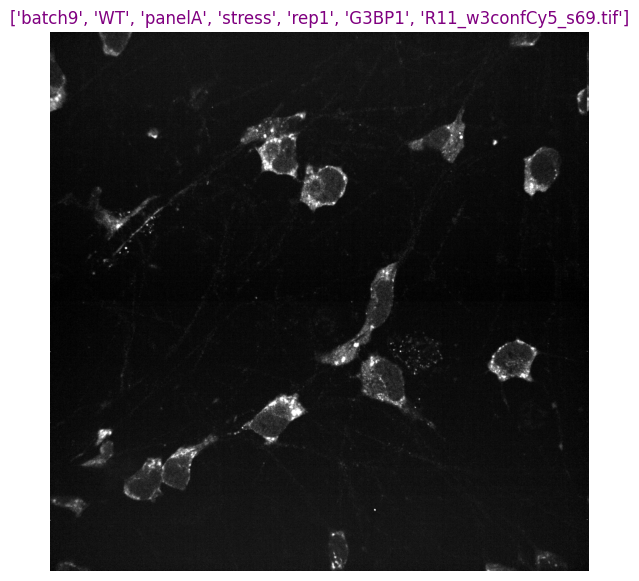


OLD batch9_16bit_no_downsample:
7 Tiles passed QC


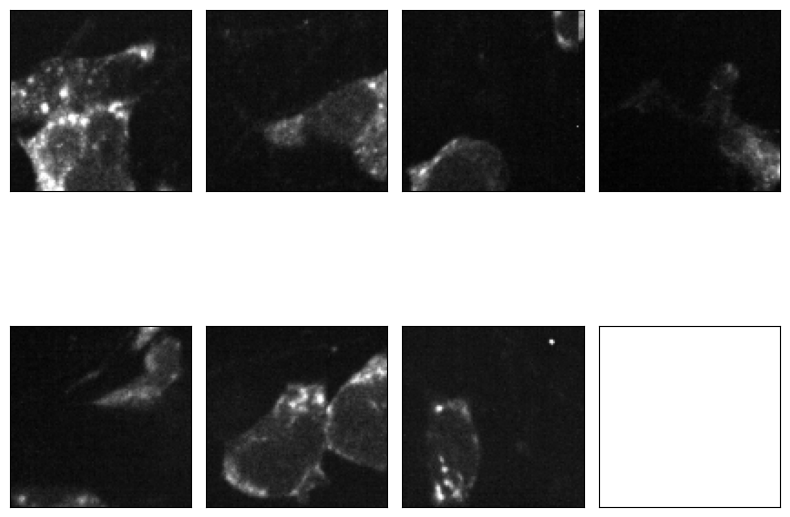


NEW Batch9:
10 Tiles passed QC


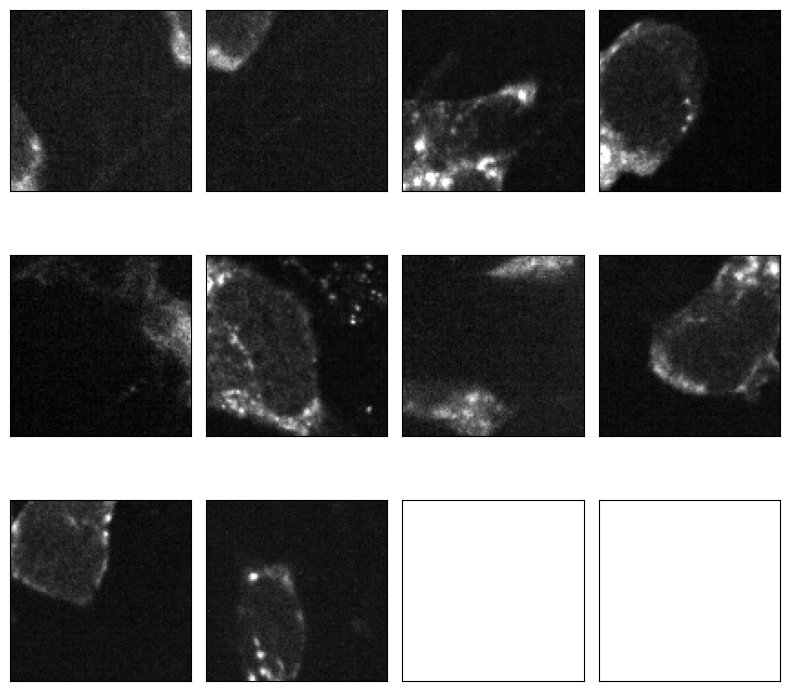

In [8]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep1_R11_w3confCy5_s69_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep1_R11_w3confCy5_s69_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

Original raw site (with rescale_intensities):


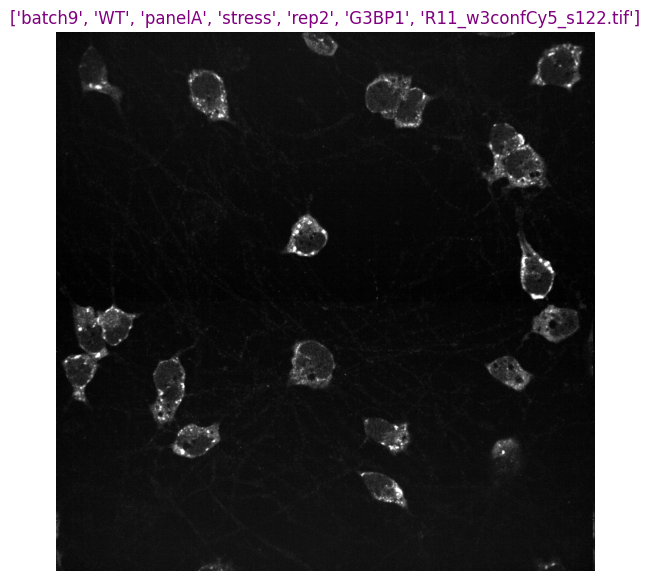


OLD batch9_16bit_no_downsample:
9 Tiles passed QC


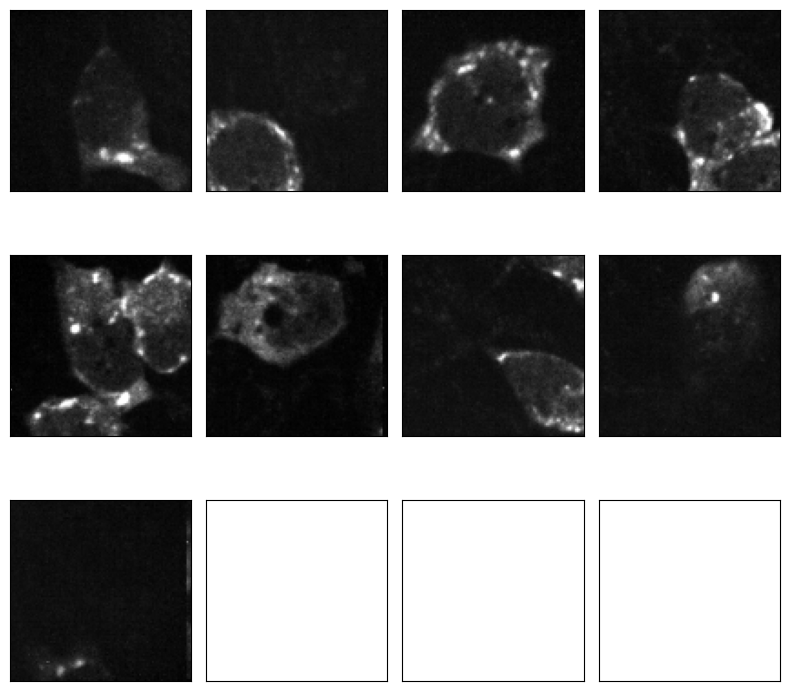


NEW Batch9:
9 Tiles passed QC


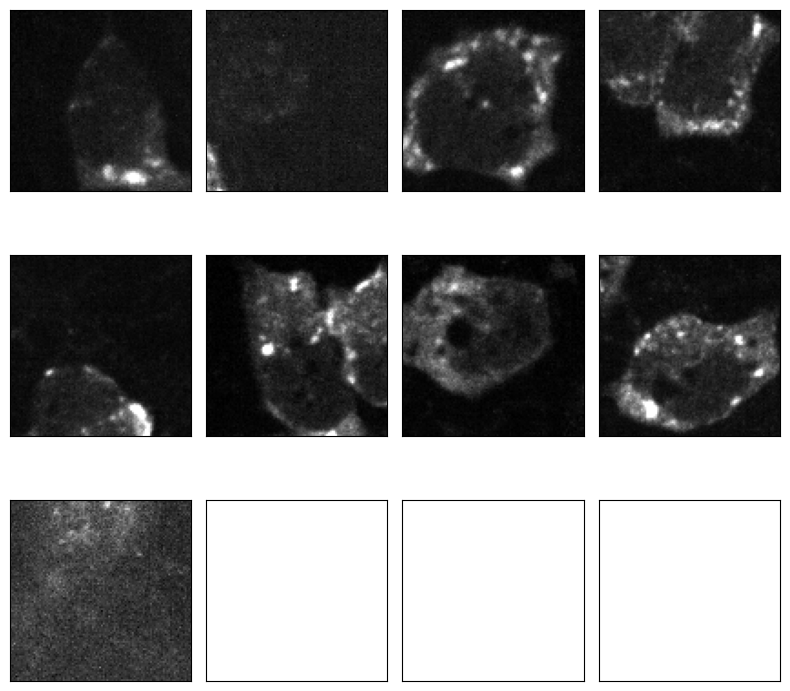

In [9]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep2_R11_w3confCy5_s122_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep2_R11_w3confCy5_s122_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

Original raw site (with rescale_intensities):


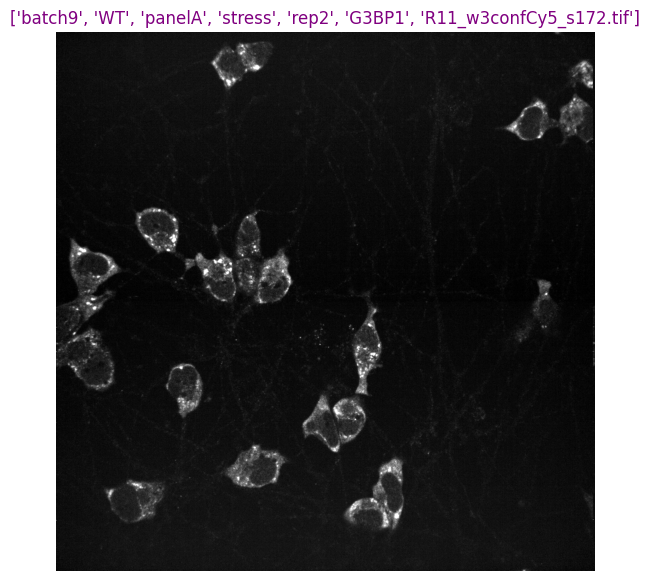


OLD batch9_16bit_no_downsample:
7 Tiles passed QC


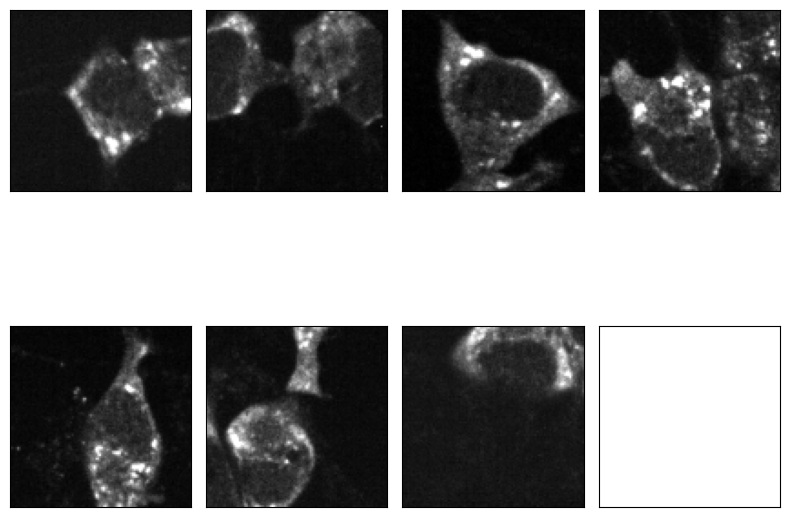


NEW Batch9:
16 Tiles passed QC


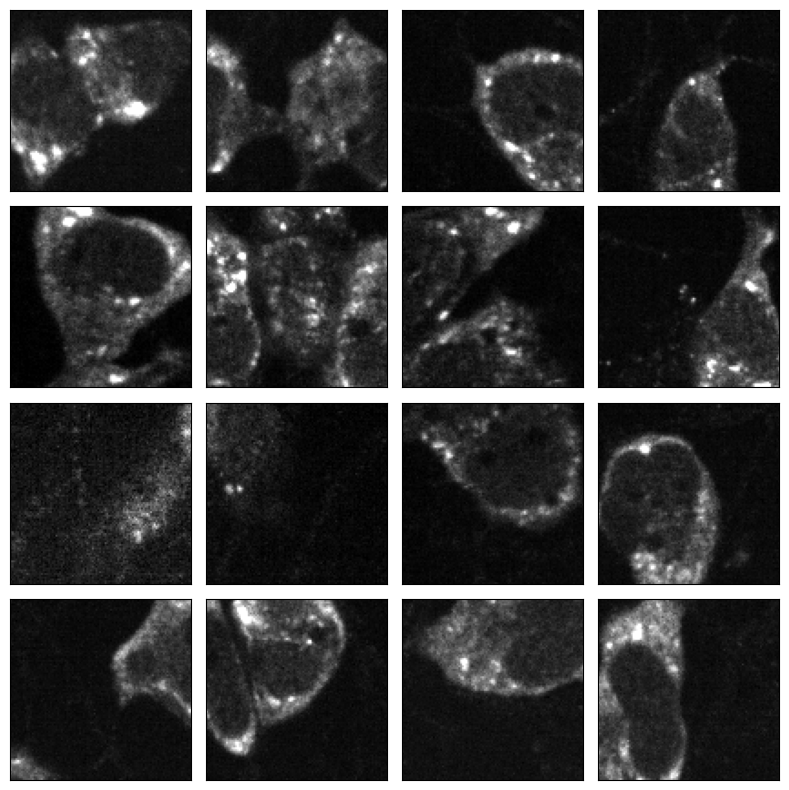

In [10]:
OLD_tiles = os.path.join(OLD_BATCH, 'rep2_R11_w3confCy5_s172_panelA_WT_processed.npy')
NEW_tiles = os.path.join(NEW_BATCH, 'rep2_R11_w3confCy5_s172_panelA_WT_processed.npy')

print("Original raw site (with rescale_intensities):") 
site_path = processed_path_to_raw_paths(OLD_tiles)
show_processed_tif(site_path)

print("\nOLD batch9_16bit_no_downsample:")
print_all_tiles_in_site(OLD_tiles)
print("\nNEW Batch9:")
print_all_tiles_in_site(NEW_tiles)

In [24]:
OLD_BATCH = os.path.join(INPUT_DIR, 'batch9_16bit_no_downsample/WT/stress/G3BP1/')
NEW_BATCH = os.path.join(INPUT_DIR, 'batch9/WT/stress/G3BP1/')
i=0
for site in os.listdir(OLD_BATCH):
    i+=1
    new_site = os.path.join(NEW_BATCH, site)
    if not os.path.exists(new_site):
        print("didn't pass in new:", site, )
        tiles_path = os.path.join(OLD_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)

print(f"{i} sited passed")

i=0
for site in os.listdir(NEW_BATCH):
    i+=1
    old_site = os.path.join(OLD_BATCH, site)
    if not os.path.exists(old_site):
        print("passed only in new:", )
        tiles_path = os.path.join(NEW_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)
print(f"{i} sited passed")

198 sited passed
198 sited passed


didn't pass in new: rep1_R11_w3confCy5_s287_panelA_WT_processed.npy


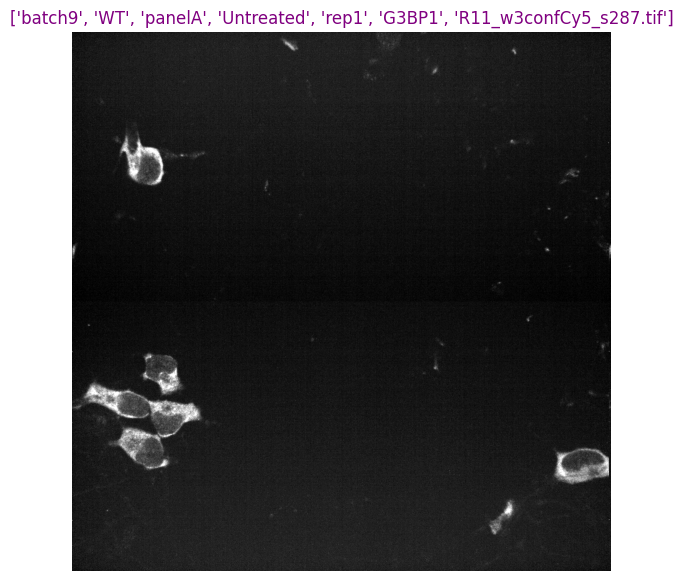

198 sited passed
passed only in new:


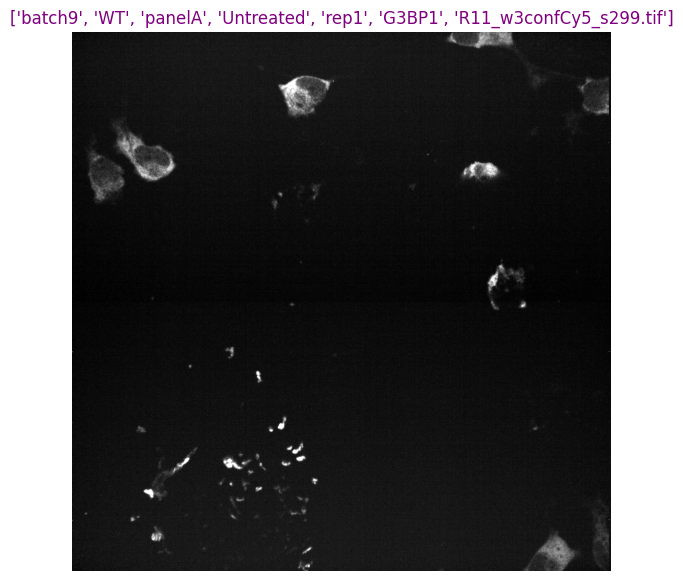

198 sited passed


In [23]:
OLD_BATCH = os.path.join(INPUT_DIR, 'batch9_16bit_no_downsample/WT/Untreated/G3BP1/')
NEW_BATCH = os.path.join(INPUT_DIR, 'batch9/WT/Untreated/G3BP1/')
i=0
for site in os.listdir(OLD_BATCH):
    i+=1
    new_site = os.path.join(NEW_BATCH, site)
    if not os.path.exists(new_site):
        print("didn't pass in new:", site, )
        tiles_path = os.path.join(OLD_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)

print(f"{i} sited passed")

i=0
for site in os.listdir(NEW_BATCH):
    i+=1
    old_site = os.path.join(OLD_BATCH, site)
    if not os.path.exists(old_site):
        print("passed only in new:", )
        tiles_path = os.path.join(NEW_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)
print(f"{i} sited passed")

In [26]:
OLD_BATCH = os.path.join(INPUT_DIR, 'batch6_16bit_no_downsample/WT/stress/G3BP1/')
NEW_BATCH = os.path.join(INPUT_DIR, 'batch6/WT/stress/G3BP1/')
i=0
for site in os.listdir(OLD_BATCH):
    i+=1
    new_site = os.path.join(NEW_BATCH, site)
    if not os.path.exists(new_site):
        print("didn't pass in new:", saite, )
        tiles_path = os.path.join(OLD_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)

print(f"{i} sited passed")

i=0
for site in os.listdir(NEW_BATCH):
    i+=1
    old_site = os.path.join(OLD_BATCH, site)
    if not os.path.exists(old_site):
        print("passed only in new:", )
        tiles_path = os.path.join(NEW_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)
print(f"{i} sited passed")

200 sited passed
200 sited passed


In [27]:
OLD_BATCH = os.path.join(INPUT_DIR, 'batch6_16bit_no_downsample/WT/Untreated/G3BP1/')
NEW_BATCH = os.path.join(INPUT_DIR, 'batch6/WT/Untreated/G3BP1/')
i=0
for site in os.listdir(OLD_BATCH):
    i+=1
    new_site = os.path.join(NEW_BATCH, site)
    if not os.path.exists(new_site):
        print("didn't pass in new:", saite, )
        tiles_path = os.path.join(OLD_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)

print(f"{i} sited passed")

i=0
for site in os.listdir(NEW_BATCH):
    i+=1
    old_site = os.path.join(OLD_BATCH, site)
    if not os.path.exists(old_site):
        print("passed only in new:", )
        tiles_path = os.path.join(NEW_BATCH, site)
        site_path = processed_path_to_raw_paths(tiles_path)
        show_processed_tif(site_path)
print(f"{i} sited passed")

200 sited passed
200 sited passed
